In [1]:
import matplotlib.pyplot as plt
import random
import networkx as nx
import pandas as pd
import numpy as np
import random
import json

In [2]:
hist = []
user_ids = []
num_users = 0
num_friends = 0
with open('yelp/yelp_academic_dataset_user.json', encoding="utf8") as f:
    for line in f:
        user = json.loads(line)
        friends = len(user['friends'].split(', '))
        user_ids.append(user['user_id'])
        hist.append(friends)
        num_users += 1
        num_friends += friends
        
num_friends = num_friends / 2 ## Amigos são contados duas vezes
print("Número de usuários: {}".format(num_users))
print("Número de médio de amigos: {}".format(num_friends / num_users))

Número de usuários: 1987897
Número de médio de amigos: 26.687505690687193


Text(0.5, 1.0, 'Frequência do número de amigos')

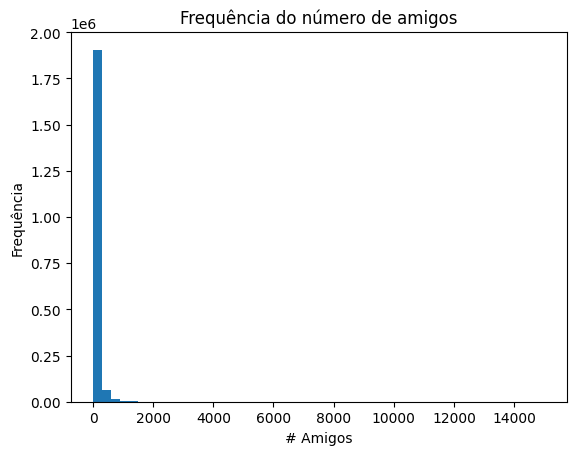

In [3]:
n, bins, patches = plt.hist(hist, bins=50)
plt.xlabel('# Amigos')
plt.ylabel('Frequência')
plt.title('Frequência do número de amigos')

In [4]:
N=1000

def select_random():    
    # Random Choice
    random.seed(42)
    selected_users = random.choices(user_ids, k=N)
    users = []
    with open('yelp/yelp_academic_dataset_user.json', encoding="utf8") as f:
        for line in f:
            user = json.loads(line)
            if user['user_id'] in selected_users:
                users.append(user)
    return users
def select_sequential():    
    # Sequential Choice
    users = []
    with open('yelp/yelp_academic_dataset_user.json', encoding="utf8") as f:
        for line in f:
            user = json.loads(line)
            users.append(user)
            if len(users) >= N:
                break
    return user
        
def add_nodes_inclusive(g, users):
    # Inclusive
    for user in users:
        g.add_node(user['user_id'])
        for friend in user['friends'].split(', '):
            g.add_node(friend)

def add_nodes_exclusive(g, users):
    # Exclusive
    for user in users:
        g.add_node(user['user_id'])

G = nx.Graph()
# (1)
#users = select_sequential()
#add_nodes_inclusive(G, users)
# (2)
users = select_sequential()
add_nodes_exclusive(G, users)
# (3)
#users = select_random()
#add_nodes_inclusive(G, users)
# (4)
#users = select_random()
#add_nodes_exclusive(G, users)
for user in users:
    for friend in user['friends'].split(', '):
        if friend in G.nodes():
            G.add_edge(user['user_id'], friend)
print("Número de usuários: {}".format(len(G.nodes())))
print("Número de amizades: {}".format(len(G.edges())))
print("Número de médio de amigos: {}".format(len(G.edges()) / len(G.nodes())))

Número de usuários: 1000
Número de amizades: 0
Número de médio de amigos: 0.0


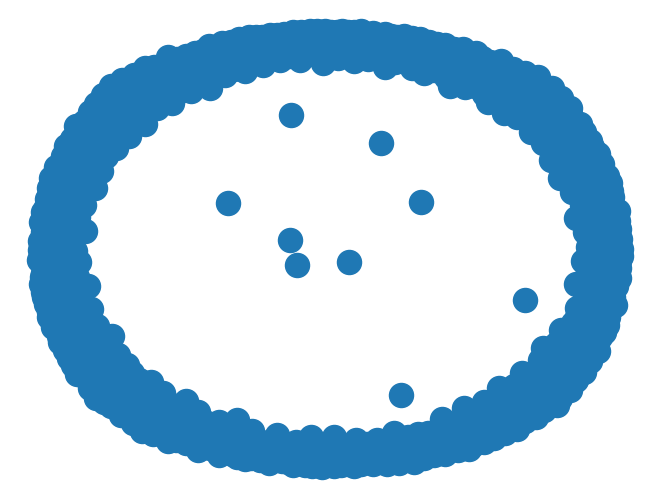

In [5]:
nx.draw(G, pos=nx.spring_layout(G))

In [6]:
degree_g = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict({
'node': list(degree_g.keys()),
'centrality': list(degree_g.values())
})
degree_df = degree_df.sort_values('centrality', ascending=False).head(50)
degree_df

,node,centrality
0,uQxkH1qQe_pF5XDLJI3XdQ,0.0
671,gDPnlu4FjHv2oaVufGso5Q,0.0
658,nyWwjoUXafW1DNnImgyNkg,0.0
659,AvHyD5Se9jTQBi3odWh9Vw,0.0
660,Ebbqu4zUKEox0QO6C1vjDA,0.0
661,2ECPjxUvIMa8AJnDR-hWmA,0.0
662,cN3dvmQ0gcmNOI8djuW3Gw,0.0
663,e-oLAe5UMRYYBxe1cIoVDA,0.0
664,VFY5ruYTOWKWLyKcAxpUfg,0.0
665,Te8eNini6-PBZ9f_LlqAJQ,0.0


In [7]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
print("Número de usuários: {}".format(len(Gcc.nodes())))
print("Número de amizades: {}".format(len(Gcc.edges())))
print("Número de médio de amigos: {}".format(len(Gcc.edges()) / len(Gcc.nodes())))

Número de usuários: 1
Número de amizades: 0
Número de médio de amigos: 0.0


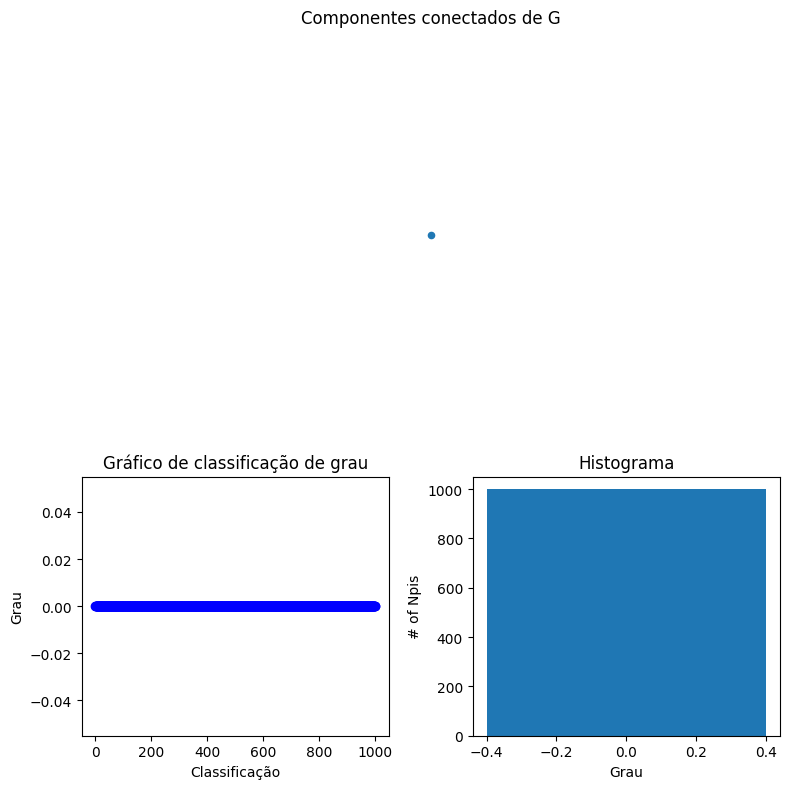

In [8]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Grau da rede de usuários", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])

pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Componentes conectados de G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Gráfico de classificação de grau")
ax1.set_ylabel("Grau")
ax1.set_xlabel("Classificação")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Histograma")
ax2.set_xlabel("Grau")
ax2.set_ylabel("# of Npis")

fig.tight_layout()
plt.show()